In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
fr_data = pd.read_csv('creditcard.csv')

In [40]:
fr_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [41]:
fr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

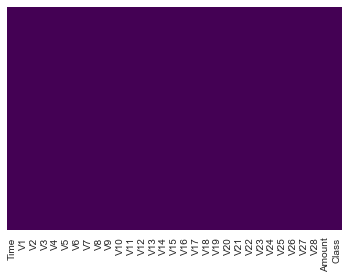

In [42]:
sns.heatmap(fr_data.isnull(),yticklabels=False,cbar=False,cmap='viridis') # good not any missing value

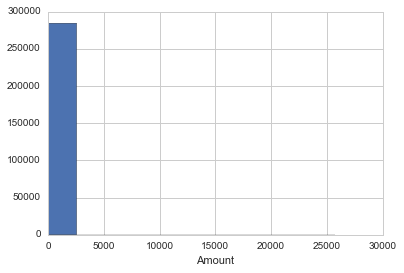

In [43]:
sns.set_style('whitegrid')
fr_data['Amount'].hist(bins=10)
plt.xlabel('Amount')

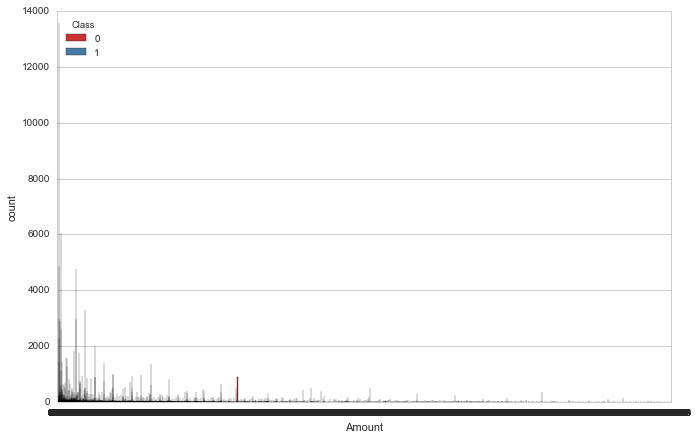

In [36]:
plt.figure(figsize=(11,7))
sns.countplot(x='Amount',hue='Class',data=fr_data,palette='Set1')

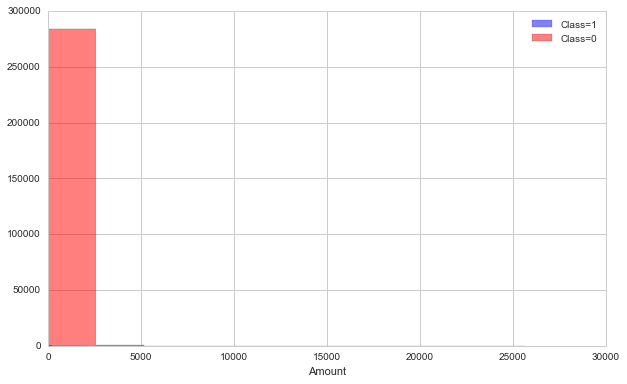

In [34]:
plt.figure(figsize=(10,6))
fr_data[fr_data['Class']==1]['Amount'].hist(alpha=0.5,color='blue',
                                              bins=10,label='Class=1')
fr_data[fr_data['Class']==0]['Amount'].hist(alpha=0.5,color='red',
                                              bins=10,label='Class=0')
plt.legend()
plt.xlabel('Amount')

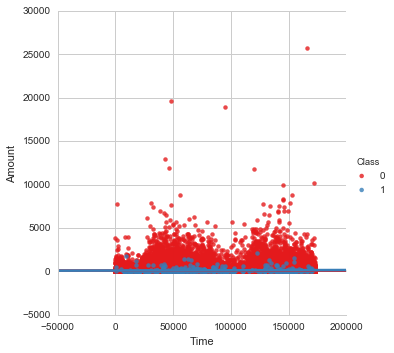

In [32]:
plt.figure(figsize=(11,7))
sns.lmplot(y='Amount',x='Time',data=fr_data,hue='Class',palette='Set1')

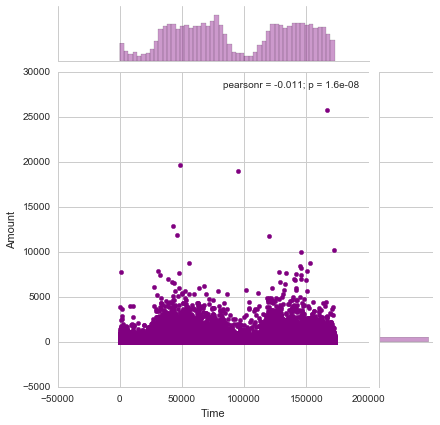

In [30]:
sns.jointplot(x='Time',y='Amount',data=fr_data, color='purple')

In [ ]:
sns.pairplot(fr_data,hue='Class',palette='bwr')

# Logistic Regression

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X = fr_data.drop('Class',axis=1)
y = fr_data['Class']

In [46]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
predictions = logmodel.predict(X_test)

In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     93838
          1       0.65      0.48      0.55       149

avg / total       1.00      1.00      1.00     93987



In [53]:
predictions

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

# Roc curve


In [54]:
from sklearn.metrics import roc_auc_score, roc_curve

In [55]:
#calculate the probabilities of the test features
pred_probs = logmodel.predict_proba(X_test)[:,1]
fpr, tpr, thres = roc_curve(y_test, pred_probs)
roc_auc_score(y_test, pred_probs)

0.84729752017292115

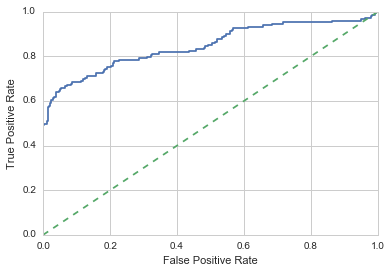

In [56]:
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

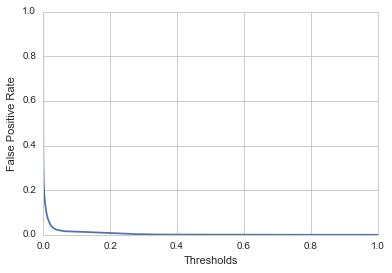

In [57]:
plt.plot(thres, fpr)
plt.xlabel("Thresholds")
plt.ylabel("False Positive Rate")
plt.show();

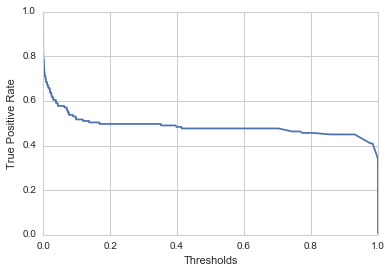

In [58]:
plt.plot(thres, tpr)
plt.xlabel("Thresholds")
plt.ylabel("True Positive Rate")
plt.show();